# Twain's *Huckleberry Finn* and *Tom Sawyer*: A Microanalysis

### William Curatolo, Brandy Piao, Andrew Sim & Andrew Teodorescu


## Introduction

American literary scholars have engaged in heated debate on the topic of the “Great American Novel” ever since writer John William DeForest coined the term in 1868. The “Great American Novel” is one that portrays distinctly American characters, language usage, and thematic elements. The invention of modern text analysis software allows digital humanists to quantitatively explore the factors that might separate a potential “Great American Novel” from another work by the same author. On the debate, Ernest Hemingway famously wrote that, “All modern American literature comes from… *Huckleberry Finn*.” A microanalysis of the two texts exposes truths about the novels that would not be easily revealed through conventional close reading. By using microanalysis in Python to compare two of Mark Twain’s most popular novels—*The Adventures of Tom Sawyer* and *The Adventures of Huckleberry Finn*— we can quantitatively examine lexical diversity, plot elements, and writing style to extract new insights and confirm observations made through close reading.

In [3]:
# Import packages.
import numpy as np
import pandas as pd
!pip install datascience
from datascience import *
import matplotlib
import matplotlib.pyplot as plots
from urllib.request import urlopen 
from scipy import stats
import re, string
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

    100% |████████████████████████████████| 40kB 3.3MB/s 
    100% |████████████████████████████████| 71kB 7.1MB/s 
    100% |████████████████████████████████| 3.1MB 9.4MB/s 
    100% |████████████████████████████████| 215kB 17.1MB/s 
    100% |████████████████████████████████| 286kB 21.1MB/s 
    100% |████████████████████████████████| 71kB 22.7MB/s 
    100% |████████████████████████████████| 552kB 20.3MB/s 
    100% |████████████████████████████████| 8.1MB 4.5MB/s 
    100% |████████████████████████████████| 51kB 21.5MB/s 
  Running setup.py bdist_wheel for datascience ... - done
  Stored in directory: /root/.cache/pip/wheels/da/24/ce/c7c52ff09b932c681f314c3c0afc9117964c444ec393a5d8b9
  Running setup.py bdist_wheel for folium ... - \ done
  Stored in directory: /root/.cache/pip/wheels/b8/09/f0/52d2ef419c2aaf4fb149f92a33e0008bdce7ae816f0dd8f0c5
  Running setup.py bdist_wheel for coverage ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/68/58/66/f1fc9afad272df

In [0]:
# Read in texts and split by chapter.
huck_finn_url = 'https://www.gutenberg.org/files/76/76-0.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

tom_sawyer_url = 'https://www.gutenberg.org/files/74/74-0.txt'
tom_sawyer_text = read_url(tom_sawyer_url)
tom_sawyer_chapters = tom_sawyer_text.split('CHAPTER')[35:]

## Part I. Type-Token Ratio

One of the most important uses of natural language processing (NLP) tools is the generation of measurements of lexical diversity, namely the type-token ratio (TTR) and the TTR degradation rate. To form the type-token ratio, the number of unique words, or types, is divided by the number of total words, or tokens. The Mean Segmental Type-Token Ratio (MSTTR) averages the TTR for all segments of the text of any given length. When setting the segment size equal to 2,000 words, the MSTTR of *Huck Finn* is slightly lower than that of *Tom Sawyer*—0.39 to 0.45, respectively. The TTR degradation rate, or the rate throughout the text at which new words are mentioned, measures how quickly a vocabulary is exhausted in a text. Though the two novels share similarly-shaped graphs, it is evident that *Huck Finn* exhausts its vocabulary at a slightly quicker rate than *Tom Sawyer*. In fact, even though *Huck Finn* has about 50 percent more tokens than *Tom Sawyer*, the two novels have almost exactly the same number of types. Considering these measurements of lexical diversity, *Huck Finn* employs a smaller, shorter vocabulary than *Tom Sawyer*.

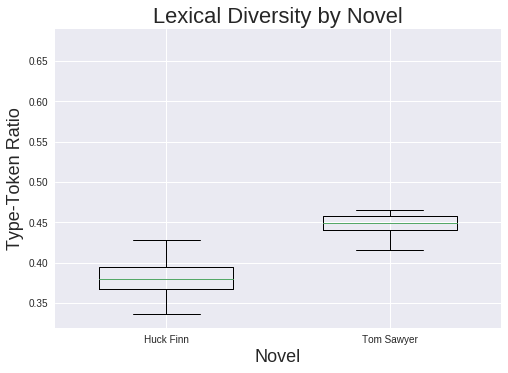

In [5]:
def clean(text):
  '''Split text by whitespace and remove punctuation (except contractions).'''
  words = text.split()
  word_split = str.maketrans('', '', string.punctuation)
  cleaned = [word.translate(word_split) for word in words]
  cleaned = [word.lower() for word in words]
  return cleaned

# Initialize variables for each string of cleaned full text.
HF_text_clean = clean(huck_finn_text)
TS_text_clean = clean(tom_sawyer_text)

# Initialize variables for each cleaned list of chapter text.
HF_chapters_clean = [clean(chapter) for chapter in huck_finn_chapters]
TS_chapters_clean = [clean(chapter) for chapter in tom_sawyer_chapters]

# Split full text up into a list of 2000-word chunks.
HF_text_chunked = []
HF_text_chunked = [HF_text_clean[x:x+2000] for x in 
                   range(0, len(HF_text_clean),2000)]
TS_text_chunked = []
TS_text_chunked = [TS_text_clean[x:x+2000] for x in 
                   range(0, len(TS_text_clean),2000)]

def ttr(text):
  '''Compute type-token ratio (TTR) for each chapter in a text.'''
  i = 0
  ttr_list = []
  unique_set = set()
  for chapter in text:
    token_i = len(text[i])
    unique_i = len(set(text[i]))
    unique_set.update(text[i])
    ttr_i = unique_i/token_i
    ttr_list.append(ttr_i)      
    i += 1
  return [ttr_list, unique_set]

# Create boxplot showing TTR.
ax1 = plots.boxplot([ttr(HF_text_chunked)[0], 
                     ttr(TS_text_chunked)[0]], 
                    positions = [1, 2], widths = 0.6)
plots.xticks([1, 2], ['Huck Finn', 'Tom Sawyer'])
plots.title('Lexical Diversity by Novel', fontsize=22)
plots.xlabel('Novel', fontsize=18)
plots.ylabel('Type-Token Ratio', fontsize=18)
plots.show()

In [6]:
# Produce descriptive statistics for TTR between novels.
print('Huck Finn has mean ' +str(stats.describe(ttr(HF_text_chunked)[0])[2])+
      ' and variance ' +str(stats.describe(ttr(HF_text_chunked)[0])[3])+'.')
print('Tom Sawyer has mean ' +str(stats.describe(ttr(TS_text_chunked)[0])[2])+
      ' and variance ' +str(stats.describe(ttr(TS_chapters_clean)[0])[3])+'.')
print()

def ttr_deg(text):
  '''Compute TTR degradation throughout text.'''
  i = 1
  ttr_deg_list = np.zeros(len(text)+1)
  unique_set = ttr(text)[1]
  ttr_deg_list[0] = len(unique_set)
  for chapter in text:
    if i < len(text):
      unique_set = unique_set.difference(set(text[i]))
      ttr_deg_list[i] += len(unique_set)
      i += 1
  return ttr_deg_list

# Create arrays from TTR degradation lists.
HF_ttr_deg = np.array(ttr_deg(HF_text_chunked))
TS_ttr_deg = np.array(ttr_deg(TS_text_chunked))

# Compute TTR for full text in 2000-word chunks.
HF_ttr_unit = np.divide(TS_ttr_deg,max(TS_ttr_deg))
TS_ttr_unit = np.divide(HF_ttr_deg,max(HF_ttr_deg))

# Find number of unique words in each full text.
print('Huck Finn has ' + str(len(ttr(HF_chapters_clean)[1])) + ' tokens.')
print('Tom Sawyer has ' + str(len(ttr(TS_chapters_clean)[1])) + ' types.')

Huck Finn has mean 0.3860374264087469 and variance 0.0021400692615197153.
Tom Sawyer has mean 0.4460422214718793 and variance 0.0027142049358898474.

Huck Finn has 13207 tokens.
Tom Sawyer has 13283 types.


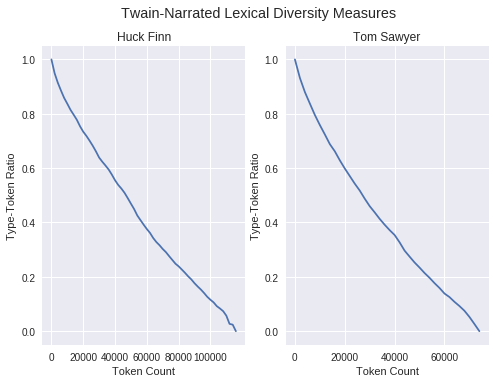

In [12]:
# Create line plot showing TTR degradation.
fig, ax = plots.subplots(1, 2)

x1_coordinate = [2000 * i for i in range(len(HF_ttr_unit))]
x2_coordinate = [2000 * i for i in range(len(TS_ttr_unit))]


ax[0].plot(x2_coordinate, TS_ttr_unit)
ax[0].set_title('Huck Finn') 
ax[1].plot(x1_coordinate, HF_ttr_unit)
ax[1].set_title('Tom Sawyer')

for a in ax.flat:
    a.set(xlabel='Token Count', ylabel='Type-Token Ratio')
    
fig.suptitle('Twain-Narrated Lexical Diversity Measures')
    
ax[0].xaxis.set_ticks(np.arange(min(x2_coordinate), max(x2_coordinate), 20000))
ax[1].xaxis.set_ticks(np.arange(min(x1_coordinate), max(x1_coordinate), 20000))

plots.show()

## Part II. Word and Character Counts

Twain's two novels share two main characters: Huck and Tom.  Examining the number of times the main characters of these novels are mentioned can yield insight into the novels, both individually and as a pair. *Tom Sawyer*, which was published first, was written in the third person.  As confirmed in the plot below, this leads to both Tom and Huck being mentioned heavily in almost all chapters.  Two other important characters, Injun Joe and Becky, are mentioned less overall. Additionally, there are stretches of ten or so chapters where Injun Joe and Becky are not mentioned at all–that is, where the graphs are flat.  In *Huck Finn*, the narration is delivered in the first person perspective of Huck.  Thus, Huck is not mentioned frequently, but his travelling companion, Jim, is the most mentioned character.  Tom is mentioned sporadically at the beginning of the novel, but towards the end, when he and Huck meet up, he is mentioned much more.  At the same time as Tom’s spike, around Chapter 30, another character, Sid, begins to be mentioned.  In fact, Huck has adopted Tom’s identity, so when Tom arrives on the scene he pretends to be his own half-brother, Sid, which explains the correlation between the increase in frequency of mentions of Tom and Sid later in the book.  Additionally, we see that a character named Buck is mentioned frequently from Chapters 15 to 21, but never before or after.  Clearly, charting how frequently characters are named can help understand the narratives of each of these two Twain novels. 


/usr/local/lib/python3.6/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


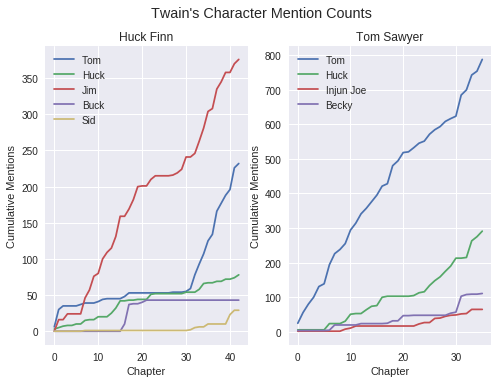

In [13]:
# Create a table whose columns represent the characters in Huck Finn
# and each row corresponds to a chapter
hf_counts = Table().with_columns([
        'Tom', np.char.count(huck_finn_chapters, 'Tom'),
        'Huck', np.char.count(huck_finn_chapters, 'Huck'),
        'Jim', np.char.count(huck_finn_chapters, 'Jim'),
        'Buck', np.char.count(huck_finn_chapters, 'Buck'),
        'Sid', np.char.count(huck_finn_chapters, 'Sid')
    ])

# Create a table whose columns represent the characters in Tom Sawyer
# and each row corresponds to a chapter
ts_counts = Table().with_columns([
        'Tom', np.char.count(tom_sawyer_chapters, 'Tom'),
        'Huck', np.char.count(tom_sawyer_chapters, 'Huck'),
        'Injun Joe', np.char.count(tom_sawyer_chapters, 'Injun Joe'),
        'Becky', np.char.count(tom_sawyer_chapters, 'Becky'),
    ])

# create cumulative counts for both tables
cum_hf_counts = hf_counts.cumsum().with_column('Chapter', np.arange(1, 44, 1))
cum_ts_counts = ts_counts.cumsum().with_column('Chapter', np.arange(1, 37, 1))


# create a plot with two subplots
f, axarr = plots.subplots(1, 2)

# for the first subplot, plot the counts from Huck Finn
# skip the last entry because it just holds the chapter numbers
for i in range(len(cum_hf_counts)-1):
  axarr[0].plot(cum_hf_counts[i])
# Set the title and legend for the subplot
axarr[0].set_title('Huck Finn')
axarr[0].legend(cum_hf_counts.labels[:-1])

# repeat for the second subplot for Tom Sawyer
for i in range(len(cum_ts_counts)-1):
  axarr[1].plot(cum_ts_counts[i])
axarr[1].set_title('Tom Sawyer')
axarr[1].legend(cum_ts_counts.labels[:-1])

# space the plots more nicely
f.subplots_adjust(hspace=0.3)

# add the main title
f.suptitle('Twain\'s Character Mention Counts')

# set the labels for the axes
for ax in axarr.flat:
    ax.set(xlabel='Chapter', ylabel='Cumulative Mentions')
    
# actually show the plot
plots.show()

Both novels are set in the 1840s in St. Petersburg, Missouri, an imaginary town along the Mississippi River. Tom and Huck are best friends in both novels, and many other characters overlap, as well. Beyond the parallels of context, however, the novels are vastly different. In the preface of *Tom Sawyer*, Twain says that the book is “intended mainly for the entertainment of boys and girls.” Conversely, Twain’s realist voice comes through powerfully in Huck Finn, an ardent social commentary that uses satire to highlight the ironies of racism in nineteenth-century America. We can use also microanalysis to check if our expectations of the frequency of mentions of thematic elements, motifs, and symbols throughout the texts align with reality. In *Huck Finn*, among the most used words are “slave”, “river”, “free”, “money”, and “rob”.  Contrastingly, in *Tom Sawyer*, among the most used words are “slave”, “river”, “cave”, “treasure”, and “adventure". By the end of Huck Finn and Tom Sawyer, "river" and "cave" were the most popularly-mentioned nouns of the bunch, suggesting that adventure in nature is a shared thematic element between the two texts.



/usr/local/lib/python3.6/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


Text(0.5,1,'Cumulative Mentions of Theme Words in Huck Finn')

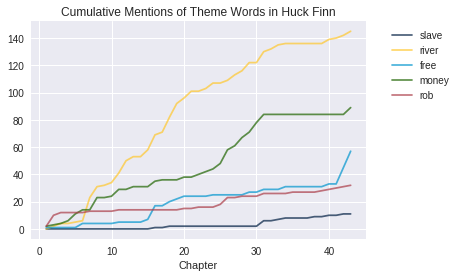

In [8]:
# Count chosen theme words appeared in each chapter of Huck Finn.

hf_theme_counts = Table().with_columns([
        'slave', np.char.count(huck_finn_chapters, 'slave'),
        'river', np.char.count(huck_finn_chapters, 'river'),
        'free', np.char.count(huck_finn_chapters, 'free'),
        'money', np.char.count(huck_finn_chapters, 'money'),
        'rob', np.char.count(huck_finn_chapters, 'rob')
    ])

cum_hf_theme = hf_theme_counts.cumsum().with_column('Chapter', 
                                                    np.arange(1, 44, 1))

# Plot word frequency in Huck Finn.
cum_hf_theme.plot(column_for_xticks=5)
plots.title('Cumulative Mentions of Theme Words in Huck Finn')

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:192: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


Text(0.5,1,'Cumulative Mentions of Theme Words in Tom Sawyer')

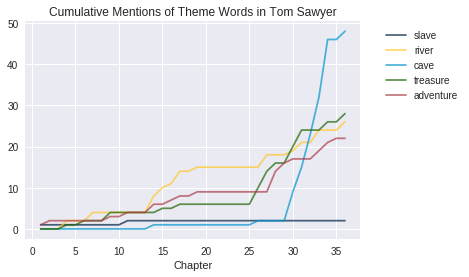

In [11]:
# Count the chosen theme words appeared in Tom Sawyer.

ts_theme_counts = Table().with_columns([
        'slave', np.char.count(tom_sawyer_chapters, 'slave'),
        'river', np.char.count(tom_sawyer_chapters, 'river'),
        'cave', np.char.count(tom_sawyer_chapters, 'cave'),
        'treasure', np.char.count(tom_sawyer_chapters, 'treasure'),
        'adventure', np.char.count(tom_sawyer_chapters, 'adventure')
    ])

cum_ts_theme = ts_theme_counts.cumsum().with_column('Chapter', 
                                                    np.arange(1, 37, 1))

# Plot word frequency in Tom Sawyer separately (for larger graphs).
cum_ts_theme.plot(column_for_xticks=5)
plots.title('Cumulative Mentions of Theme Words in Tom Sawyer')

## Part III. Measures of Length

We can compare the sentence density of the two books by looking at the number of textual characters in each chapter, the number of periods in each chapter, and the length of sentences in each chapter. Per the intuition of our analysis in Part I, we begin with the assumption that *Tom Sawyer* will have, in terms of character frequency, longer chapters and longer sentences on average than *Huck Finn*. First, we split the text into separate chapters and create a table for each variable that we are interested in. Next, we create a scatterplot that helps us better visualize the length of chapters by character frequency and the number of periods in each text. Interestingly, from the scatterplot, we find that these two texts have a similar number of periods, or sentences, in each chapter, as well as similar chapter length (again, by character frequency). This contradicts our original assumption that *Tom Sawyer* has a longer and more complex writing style than Huck Finn. Therefore, we must look further into the average length of sentences (by character frequency) with respect to each chapter. Computing the average sentence length of each chapter by dividing the number of chapters by the number of periods, we visualize these results by creating boxplot for each text. It is clear to see that *Huck Finn* has a greater average sentence length than *Tom Sawyer*, despite being a less lexically-diverse text, as discovered in Part I. Additionally, *Huck Finn* also has a wider range of sentence length than *Tom Sawyer*. In other words, *Tom Sawyer* and *Huck Finn* have similar text density, but *Tom Sawyer* has a more consistent sentence length than *Huck Finn*.

Text(0.5,1,'Twain-Narrated Sentence Frequency')

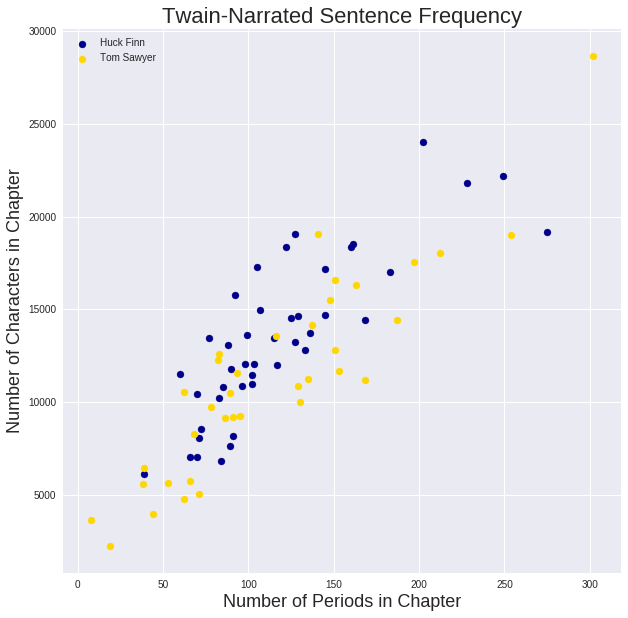

In [10]:
chars_periods_HF = Table().with_columns([
        'HF Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.'),
        'Length of Sentences', [len(s) for s in huck_finn_chapters]/
    (np.char.count(huck_finn_chapters, '.'))])
chars_periods_TS = Table().with_columns([
        'TS Chapter Length', [len(s) for s in tom_sawyer_chapters],
        'Number of Periods', np.char.count(tom_sawyer_chapters, '.'),
        'Length of Sentences', [len(s) for s in tom_sawyer_chapters]/
    (np.char.count(tom_sawyer_chapters, '.'))])

# Plot number of characters and number of periods in each chapter between novels.
plots.figure(figsize=(10,10))
plots.scatter(chars_periods_HF[1], chars_periods_HF[0], color='darkblue')
plots.scatter(chars_periods_TS[1], chars_periods_TS[0], color='gold')
plots.xlabel('Number of Periods in Chapter', fontsize=18)
plots.ylabel('Number of Characters in Chapter', fontsize=18);
plots.legend(['Huck Finn', 'Tom Sawyer'])
plots.title('Twain-Narrated Sentence Frequency', fontsize=22)

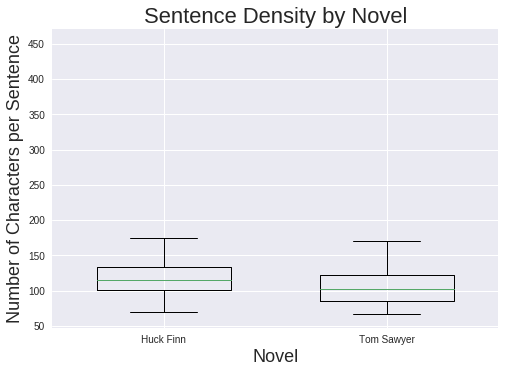

In [12]:
sentence_density = [chars_periods_HF[2], chars_periods_TS[2]]
plots.boxplot(sentence_density, positions = [1, 2], widths = 0.6)
plots.xticks([1, 2], ['Huck Finn', 'Tom Sawyer'])
plots.title('Sentence Density by Novel', fontsize=22)
plots.xlabel('Novel', fontsize=18)
plots.ylabel('Number of Characters per Sentence', fontsize=18)
plots.show()

## Conclusion

Microanalysis enables digital humanists to draw new quantitative insights from a text that may be muddled in qualitative analysis. Comparing *Tom Sawyer* and *Huck Finn* in this manner provides for a better comprehension of the differences and similarities between the novels’ plot structures and narration styles; in addition, this analysis spurs new questions that challenge conventional wisdom about what constitutes a great novel. Though considered a “Great American Novel,” *Huck Finn* uses more simple language than *Tom Sawyer*, which is a children’s novel. To further investigate the relationship between a text’s complexity and its potential for being considered a “Great American Novel,” mesoanalysis, a combination of microanalysis and macroanalysis, could be employed as a research methodology.